# 6.1.4 Generate Random Latitudes and Longitudes

### Create Latitude and Longitude Combinations

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# 6.1.5 Generate Random World Cities

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

# 6.2.6 Get the City Weather Data

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | emerald
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | svetlogorsk
Processing Record 5 of Set 1 | caravelas
Processing Record 6 of Set 1 | samusu
City not found. Skipping...
Processing Record 7 of Set 1 | mehran
Processing Record 8 of Set 1 | cheuskiny
City not found. Skipping...
Processing Record 9 of Set 1 | namatanai
Processing Record 10 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | safwah
City not found. Skipping...
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | torbay
Processing Record 19 of Set 1 | saskylakh
Processing Record 20 of Set 1 | atuona
Processing Record 21 of

Processing Record 34 of Set 4 | algeciras
Processing Record 35 of Set 4 | hovd
Processing Record 36 of Set 4 | adrar
Processing Record 37 of Set 4 | berlevag
Processing Record 38 of Set 4 | forrest city
Processing Record 39 of Set 4 | chara
Processing Record 40 of Set 4 | mango
Processing Record 41 of Set 4 | itapemirim
Processing Record 42 of Set 4 | thompson
Processing Record 43 of Set 4 | vysokogornyy
Processing Record 44 of Set 4 | east london
Processing Record 45 of Set 4 | kavieng
Processing Record 46 of Set 4 | brae
Processing Record 47 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 48 of Set 4 | saint-pierre
Processing Record 49 of Set 4 | maria la baja
Processing Record 50 of Set 4 | ruatoria
City not found. Skipping...
Processing Record 1 of Set 5 | necochea
Processing Record 2 of Set 5 | west fargo
Processing Record 3 of Set 5 | ponta do sol
Processing Record 4 of Set 5 | puqi
Processing Record 5 of Set 5 | longyearbyen
Processing Record 6 of Set 5 | garow

Processing Record 24 of Set 8 | gamba
Processing Record 25 of Set 8 | bagdarin
Processing Record 26 of Set 8 | westport
Processing Record 27 of Set 8 | kodaikanal
Processing Record 28 of Set 8 | husavik
Processing Record 29 of Set 8 | mazyr
Processing Record 30 of Set 8 | teya
Processing Record 31 of Set 8 | hunza
City not found. Skipping...
Processing Record 32 of Set 8 | codrington
Processing Record 33 of Set 8 | mehamn
Processing Record 34 of Set 8 | uaua
Processing Record 35 of Set 8 | north bend
Processing Record 36 of Set 8 | torrevieja
Processing Record 37 of Set 8 | kahului
Processing Record 38 of Set 8 | mersing
Processing Record 39 of Set 8 | dalian
Processing Record 40 of Set 8 | kruisfontein
Processing Record 41 of Set 8 | high rock
Processing Record 42 of Set 8 | zaragoza
Processing Record 43 of Set 8 | eyl
Processing Record 44 of Set 8 | graaff-reinet
Processing Record 45 of Set 8 | souillac
Processing Record 46 of Set 8 | borovichi
Processing Record 47 of Set 8 | rincon


Processing Record 16 of Set 12 | lambari
Processing Record 17 of Set 12 | novoagansk
Processing Record 18 of Set 12 | lufilufi
Processing Record 19 of Set 12 | bonthe
Processing Record 20 of Set 12 | kirakira
Processing Record 21 of Set 12 | yumen
Processing Record 22 of Set 12 | corbelia
Processing Record 23 of Set 12 | sharan
Processing Record 24 of Set 12 | starodub
Processing Record 25 of Set 12 | kalianget
Processing Record 26 of Set 12 | ende
Processing Record 27 of Set 12 | nador
Processing Record 28 of Set 12 | loandjili
Processing Record 29 of Set 12 | pathri
Processing Record 30 of Set 12 | cairns
Processing Record 31 of Set 12 | sembe
Processing Record 32 of Set 12 | khonuu
City not found. Skipping...
Processing Record 33 of Set 12 | benghazi
Processing Record 34 of Set 12 | tecoanapa
Processing Record 35 of Set 12 | phatthalung
Processing Record 36 of Set 12 | sitka
Processing Record 37 of Set 12 | yasugi
Processing Record 38 of Set 12 | kloulklubed
Processing Record 39 of 

In [9]:
len(city_data)

575

# 6.2.7 Create a DataFrame of City Weather Data

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Emerald,-23.53,148.17,84.20,25,0,9.17,AU,2020-09-30 07:38:01
1,Hithadhoo,-0.60,73.08,83.53,66,100,5.99,MV,2020-09-30 07:38:02
2,Rikitea,-23.12,-134.97,70.00,80,37,22.73,PF,2020-09-30 07:35:57
3,Svetlogorsk,52.63,29.73,59.59,58,98,16.98,BY,2020-09-30 07:38:02
4,Caravelas,-17.71,-39.25,72.19,89,40,4.27,BR,2020-09-30 07:36:50
5,Mehran,33.12,46.16,80.60,30,0,11.41,IR,2020-09-30 07:38:02
6,Namatanai,-3.67,152.43,80.53,80,31,7.90,PG,2020-09-30 07:38:03
7,Vaini,-21.20,-175.20,77.00,94,75,12.75,TO,2020-09-30 07:38:03
8,Barrow,71.29,-156.79,32.00,98,90,10.29,US,2020-09-30 07:36:06
9,Anadyr,64.75,177.48,41.00,75,100,8.95,RU,2020-09-30 07:38:04


In [11]:
city_data_new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[city_data_new_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Emerald,AU,2020-09-30 07:38:01,-23.53,148.17,84.20,25,0,9.17
1,Hithadhoo,MV,2020-09-30 07:38:02,-0.60,73.08,83.53,66,100,5.99
2,Rikitea,PF,2020-09-30 07:35:57,-23.12,-134.97,70.00,80,37,22.73
3,Svetlogorsk,BY,2020-09-30 07:38:02,52.63,29.73,59.59,58,98,16.98
4,Caravelas,BR,2020-09-30 07:36:50,-17.71,-39.25,72.19,89,40,4.27
...,...,...,...,...,...,...,...,...,...
570,El Dorado,US,2020-09-30 07:40:09,33.21,-92.67,51.80,100,1,4.54
571,Rio Gallegos,AR,2020-09-30 07:40:09,-51.62,-69.22,33.80,74,85,19.46
572,Bundaberg,AU,2020-09-30 07:40:10,-24.85,152.35,73.00,46,39,11.41
573,Colesberg,ZA,2020-09-30 07:40:10,-30.72,25.10,60.98,24,0,13.47


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1 Plot Latitude vs. Temperature

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'09/30/20'

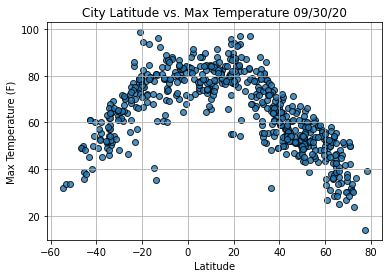

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# 6.3.2 Plot Latitude vs. Humidity

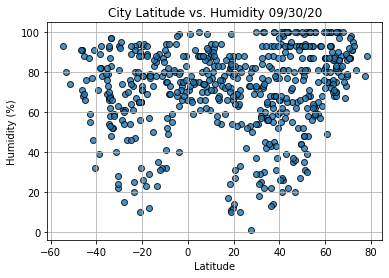

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# 6.3.3 Plot Latitude vs. Cloudiness

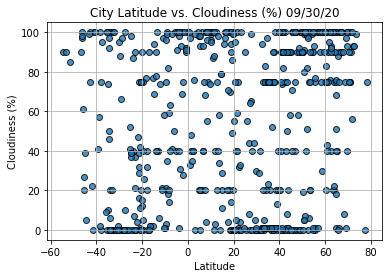

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# 6.3.4 Plot Latitude vs. Wind Speed


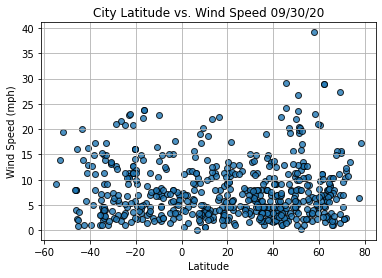

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()